# Косенко Никита
## Лабораторная работа №1, вариант 9

In [360]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import chisquare, norm, probplot

In [361]:
df = pd.read_csv("data_v1-09.csv")
X = df['x'].values.reshape(-1, 1)
y = df['y'].values
df

,x,y
0,0.01000,2.37900
1,0.11091,1.78990
2,0.21182,1.37950
3,0.31273,1.72080
4,0.41364,1.59010
...,...,...
95,9.59640,0.25729
96,9.69730,0.25714
97,9.79820,0.27314
98,9.89910,0.31154


### Задание 1
Построить полиномиальные регрессионные модели при m = 1,2,3, используя метод OLS, рассчитать коэффициент детерминации моделей на обучающей и тестовой выборках. На диаграмме рассеяния исходных данных вывести рассчитанные функции регрессии.

Формула полиномиальной регрессии:
$$h(x) = \beta_0 + \sum_{i = 1} ^{m} \beta_i x^i$$

Для m = 1:
$$h(x) = \beta_0 + \beta_1 x$$

Для m = 2:
$$h(x) = \beta_0 + \beta_1 x + \beta_2 x^2$$

Для m = 3:
$$h(x) = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3$$

Разделим данные на обучающую и тестовую выборки в соотношении 70/30

In [362]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

Функция для построения полиномиальной  регрессии

In [363]:
def poly_regression(X_train, X_test, y_train, y_test, degree):
    # Создаем полиномиальные признаки
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)

    # Добавляем константу
    X_poly_train = sm.add_constant(X_poly_train)
    X_poly_test = sm.add_constant(X_poly_test)

    # Создаем и обучаем модель OLS
    model = sm.OLS(y_train, X_poly_train)
    results = model.fit()

    # Предсказания
    y_train_pred = results.predict(X_poly_train)
    y_test_pred = results.predict(X_poly_test)

    # Рассчитываем R^2
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    return results, poly_features, r2_train, r2_test

Создадим список моделей и выведем сводку по модели для m = 1

In [364]:
models = []
r2_scores = []

for m in [1, 2, 3]:
    results, poly_features, r2_train, r2_test = poly_regression(
        X_train, X_test, y_train, y_test, m)
    models.append((results, poly_features))
    r2_scores.append((r2_train, r2_test))

results_m1, poly_features, r2_train, r2_test = poly_regression(
    X_train, X_test, y_train, y_test, 1)
print(f"m = {1}:")
print(f"R^2 (train): {r2_train:.4f}")
print(f"R^2 (test): {r2_test:.4f}")
print(results_m1.summary())  # Выводим подробную статистику модели

m = 1:
R^2 (train): 0.5462
R^2 (test): 0.4891
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     81.85
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           2.78e-13
Time:                        00:55:55   Log-Likelihood:                -12.972
No. Observations:                  70   AIC:                             29.94
Df Residuals:                      68   BIC:                             34.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

Выведем сводку для m = 2

In [365]:
results_m2, poly_features, r2_train, r2_test = poly_regression(
    X_train, X_test, y_train, y_test, 2)
print(f"m = {2}:")
print(f"R^2 (train): {r2_train:.4f}")
print(f"R^2 (test): {r2_test:.4f}")
print(results_m2.summary())  # Выводим статистику модели

m = 2:
R^2 (train): 0.8324
R^2 (test): 0.7655
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     166.4
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           1.02e-26
Time:                        00:55:55   Log-Likelihood:                 21.899
No. Observations:                  70   AIC:                            -37.80
Df Residuals:                      67   BIC:                            -31.05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

Выведем сводку для m = 3

In [366]:
results_m3, poly_features, r2_train, r2_test = poly_regression(
    X_train, X_test, y_train, y_test, 3)
print(f"m = {3}:")
print(f"R^2 (train): {r2_train:.4f}")
print(f"R^2 (test): {r2_test:.4f}")
print(results_m3.summary())  # Выводим статистику модели

m = 3:
R^2 (train): 0.8548
R^2 (test): 0.8361
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     129.6
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           1.33e-27
Time:                        00:55:55   Log-Likelihood:                 26.921
No. Observations:                  70   AIC:                            -45.84
Df Residuals:                      66   BIC:                            -36.85
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

Построим график с отображением значений и трех регрессионных моделей

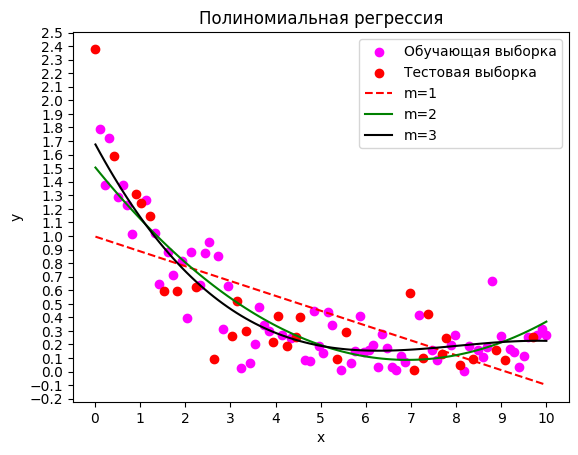

In [376]:
# Создаем массив X для построения функций регрессии
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Цикл по моделям
colors = ['red', 'green', 'black']
labels = ['m=1', 'm=2', 'm=3']
linestyles = ['--', '-', '-']

# Вывод графика
plt.scatter(X_train, y_train, label='Обучающая выборка', color='magenta')
plt.scatter(X_test, y_test, label='Тестовая выборка', color='red')

for i, (results, poly_features) in enumerate(models):
    # Преобразуем X_plot в полиномиальные признаки
    X_poly_plot = poly_features.transform(X_plot)
    X_poly_plot = sm.add_constant(X_poly_plot)

    # Рассчитываем предсказания для X_plot
    y_plot_pred = results.predict(X_poly_plot)

    # Выводим график
    plt.plot(X_plot, y_plot_pred,
             label=labels[i], color=colors[i], linestyle=linestyles[i])

# Выводим легенду и показываем график
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Полиномиальная регрессия')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.1))

plt.show()

### Задание 2
Обучить нелинейную экспоненциальную модель, рассчитать коэффициент детерминации модели на обучающей и тестовой выборках, сравнить результаты с полиномиальными моделями.

Формула экспоненциальной модели:
$$h(x) = \beta_0 exp(\beta_1 x)$$

R^2 (train): 0.8147
R^2 (test): 0.8083
Optimal beta_0: 1.658842709385098
Optimal beta_1: -0.3910185233544168


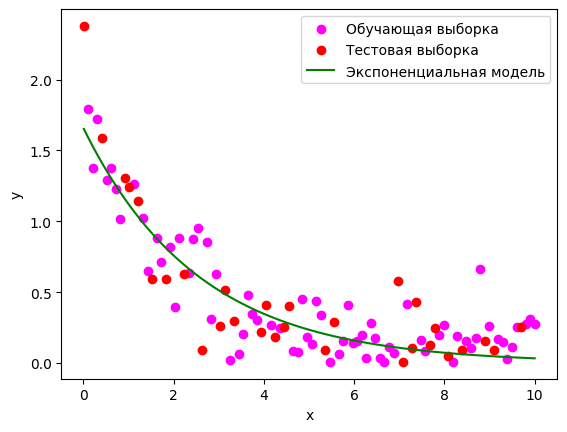

In [368]:
# Функция экспоненциальной модели
# a -- beta_0, b -- beta_1
def exp_model(x: np.array, a:float, b:float) -> np.array:
    return a * np.exp(b * x)

# Обучение модели
popt, _ = curve_fit(exp_model, X_train.ravel(), y_train, method='lm')
# Предсказания
y_train_pred_exp = exp_model(X_train, *popt)
y_test_pred_exp = exp_model(X_test, *popt)

# Рассчитываем R^2
r2_train = r2_score(y_train, y_train_pred_exp)
r2_test = r2_score(y_test, y_test_pred_exp)

print(f"R^2 (train): {r2_train:.4f}")
print(f"R^2 (test): {r2_test:.4f}")
print(f"Optimal beta_0: {popt[0]}")
print(f"Optimal beta_1: {popt[1]}")

# Вывод графика экспоненциальной модели
plt.clf()
plt.scatter(X_train, y_train, label='Обучающая выборка', color='magenta')
plt.scatter(X_test, y_test, label='Тестовая выборка', color='red')
y_plot_pred = exp_model(X_plot, *popt)
plt.plot(X_plot, y_plot_pred, label='Экспоненциальная модель', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Результаты:

По резульатам сравнения моделей между собой, можно сделать вывод, что лучшей моделью является полиномиальная модель с m = 3, которая имеет наибольший коэффициент детерминации как на тестовых, так и на обучающих данных, наименьшие коэффициенты BIC и AIC. Чуть хуже полиномиальная модель (m = 2), еще хуже экспоненциальная и самая худшая -- полиномиальная для m = 1.

### Задание 3
Построить зависимость значения MSE от параметров нелинейной модели (визуализировать в виде поверхности и контурной диаграммы). Определить визуально оптимальные значения параметров и сравнить их со значениями, найденными в результате обучения.

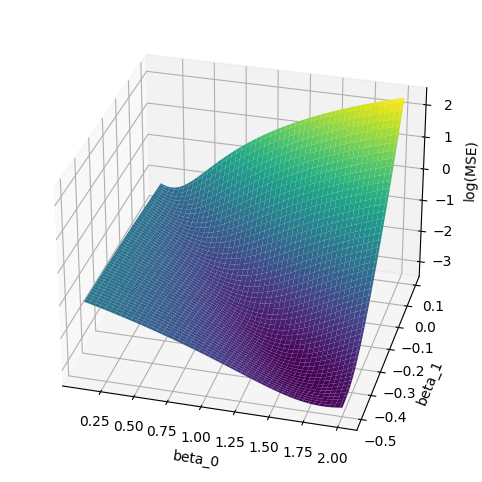

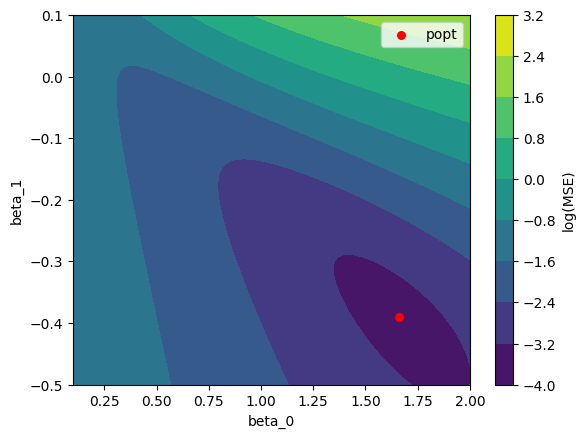

In [369]:
# Генерация сетки параметров
a_range = np.linspace(0.1, 2, 100)
b_range = np.linspace(-0.5, 0.1, 100)
A, B = np.meshgrid(a_range, b_range)

# Вычисление MSE для каждой точки сетки
mse_values = np.zeros_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        y_pred = exp_model(X_train, A[i, j], B[i, j])
        y_pred = y_pred.reshape(len(y_train))
        mse_values[i, j] = np.mean((y_train - y_pred) ** 2)

# Визуализация поверхности MSE
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A, B, np.log(mse_values), cmap='viridis')
ax.set_xlabel('beta_0')
ax.set_ylabel('beta_1')
ax.set_zlabel('log(MSE)')
# Настройка угла обзора
ax.view_init(elev=30, azim=285)
plt.show()

# Визуализация контурной диаграммы MSE
plt.contourf(A, B, np.log(mse_values), cmap='viridis')
plt.colorbar(label='log(MSE)')
plt.xlabel('beta_0')
plt.ylabel('beta_1')
# Добавляем точку popt
popt_point = plt.scatter(popt[0], popt[1], color='red', s=30)
# Добавляем легенду
plt.legend([popt_point], ['popt'], loc='upper right')
plt.show()

По визуаьной оценке параметры, подобранные алгоритмом обучения ($\beta_0 = 1.6588, \beta_1 = -0.391018$) являются одними из наиболее оптимальных, поскольку находятся в районе наименьшего MSE.

### Задание 4
Применить логарифмическое преобразование результирующей переменной и построить простейшую линейную регрессионную модель. Рассчитать коэффициент детерминации модели на обучающей и тестовой выборках, визуализировать полученную функцию регрессии, сравнить с результатами пунктов 1 и 2.

In [370]:
y = np.log(y)
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Добавление константы в матрицу X
X_train_linear = sm.add_constant(X_train_linear)
X_test_linear = sm.add_constant(X_test_linear)

# Построение модели OLS
model_linear = sm.OLS(y_train_linear, X_train_linear)
results_linear = model_linear.fit()

# Предсказания
y_train_pred_linear = results_linear.predict(X_train_linear)
y_test_pred_linear = results_linear.predict(X_test_linear)

# Рассчитываем коэффициент детерминации
r2_train = results_linear.rsquared
r2_test = r2_score(y_test_linear, y_test_pred_linear)

print(f"R^2 (train): {r2_train:.4f}")
print(f"R^2 (test): {r2_test:.4f}")

# Выводим подробную статистику модели
print(results_linear.summary())

R^2 (train): 0.3326
R^2 (test): 0.4677
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     33.88
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           1.74e-07
Time:                        00:55:55   Log-Likelihood:                -99.273
No. Observations:                  70   AIC:                             202.5
Df Residuals:                      68   BIC:                             207.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

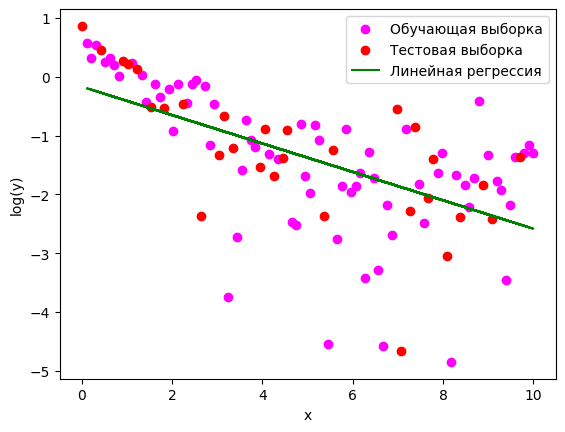

In [371]:
# Визуализация полученной функции регрессии
plt.scatter(X_train_linear[:, 1], y_train_linear, label='Обучающая выборка', color='magenta')
plt.scatter(X_test_linear[:, 1], y_test_linear, label='Тестовая выборка', color='red')
plt.plot(X_train_linear[:, 1], y_train_pred_linear, label='Линейная регрессия', color='green')
plt.xlabel('x')
plt.ylabel('log(y)')
plt.legend()
plt.show()

Выводы: полученная функция регрессии вообще не отражает реального поведения системы. Коэффициент детерминации еще хуже, чем у самой простой полиномиальной регрессии, поэтому данная модель  не может быть использована для прогнозирования поведения системы.

### Задание 5
Построить гистограммы распределения остатков моделей, обученных в пп. 1, 2, 4 на обучающей и тестовой выборках, проверить распределения остатков на нормальность, используя критерий «хи-квадрат» (привести значения статистики критерия, p-value, статистическое решение). Оценить нормальность остатков визуально по Q-Q диаграммам.

In [372]:
# Остатки полиномиальных моделей
results_m1, poly_features_m1, r2_train_m1, r2_test_m1 = poly_regression(
    X_train, X_test, y_train, y_test, 1)
y_train_pred_m1 = results_m1.predict(sm.add_constant(X_train))
y_test_pred_m1 = results_m1.predict(sm.add_constant(X_test))

results_m2, poly_features_m2, r2_train_m2, r2_test_m2 = poly_regression(
    X_train, X_test, y_train, y_test, 2)
y_train_pred_m2 = results_m2.predict(
    sm.add_constant(poly_features_m2.transform(X_train)))
y_test_pred_m2 = results_m2.predict(
    sm.add_constant(poly_features_m2.transform(X_test)))

results_m3, poly_features_m3, r2_train_m3, r2_test_m3 = poly_regression(
    X_train, X_test, y_train, y_test, 3)
y_train_pred_m3 = results_m3.predict(
    sm.add_constant(poly_features_m3.transform(X_train)))
y_test_pred_m3 = results_m3.predict(
    sm.add_constant(poly_features_m3.transform(X_test)))

residuals_poly_m1 = [y_train - y_train_pred_m1, y_test - y_test_pred_m1]
residuals_poly_m2 = [y_train - y_train_pred_m2, y_test - y_test_pred_m2]
residuals_poly_m3 = [y_train - y_train_pred_m3, y_test - y_test_pred_m3]

# Остатки экспоненциальной модели
residuals_exp = [y_train - y_train_pred_exp.reshape(len(y_train)), y_test - y_test_pred_exp.reshape(len(y_test))]

# Остатки простейшей линейной модели
residuals_linear = [y_train_linear - y_train_pred_linear, y_test_linear - y_test_pred_linear]

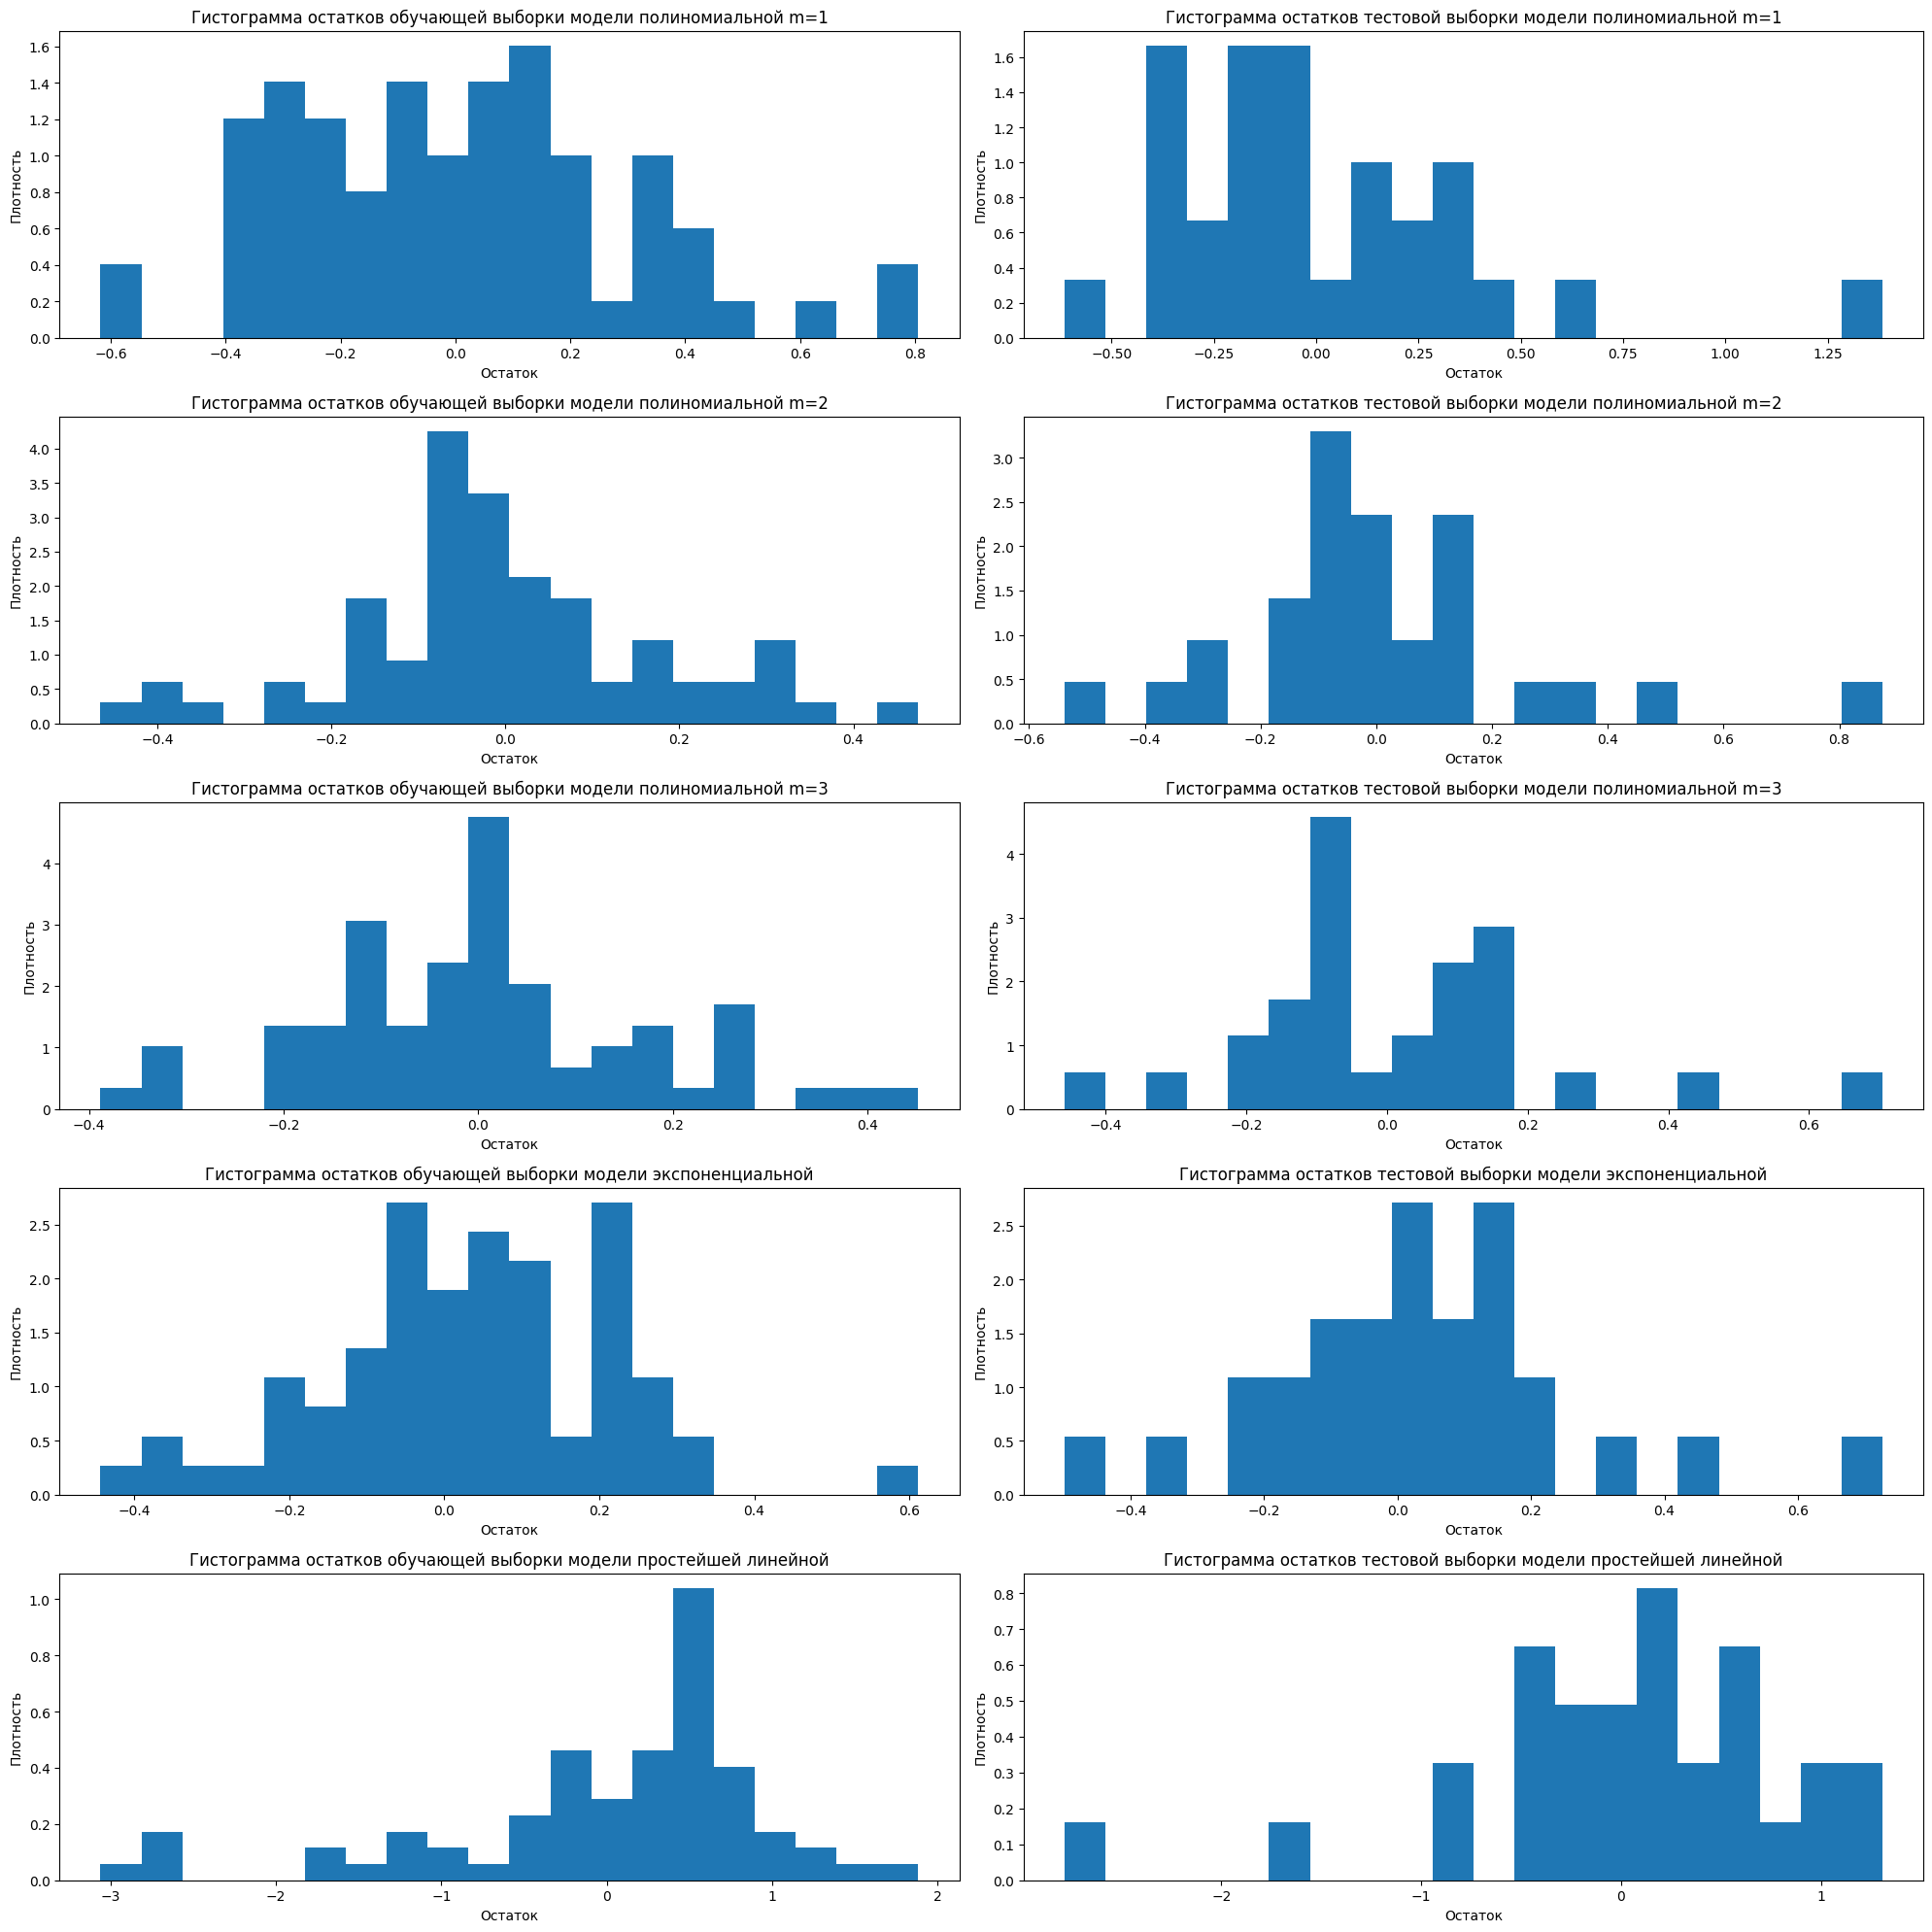

In [373]:
# Построение гистограмм распределения остатков
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
for i, residuals in enumerate([residuals_poly_m1, residuals_poly_m2, residuals_poly_m3, residuals_exp, residuals_linear]):
    for j, residual in enumerate(residuals):
        axs[i, j].hist(residual, bins=20, density=True)
        axs[i, j].set_title(f"Гистограмма остатков {['обучающей', 'тестовой'][j]} выборки модели {['полиномиальной m=1', 'полиномиальной m=2', 'полиномиальной m=3', 'экспоненциальной', 'простейшей линейной'][i]}")
        axs[i, j].set_xlabel("Остаток")
        axs[i, j].set_ylabel("Плотность")

plt.tight_layout()
plt.show()

In [374]:
# Проверка нормальности распределения остатков с помощью критерия «хи-квадрат»
for i, residuals in enumerate([residuals_poly_m1, residuals_poly_m2, residuals_poly_m3, residuals_exp, residuals_linear]):
    for j, residual in enumerate(residuals):
        stat, p = chisquare(residual)
        print(f"Критерий «хи-квадрат» для {['ОБУЧАЮЩЕЙ', 'ТЕСТОВОЙ'][j]} выборки {['полиномиальной m = 1', 'полиномиальной m = 2', 'полиномиальной m = 3', 'экспоненциальной', 'простейшей линейной'][i]} модели:\nstat={stat:.4f}, p={p:.4f}")
        if p < 0.05:
            print("Отклоняем нулевую гипотезу о нормальности распределения остатков\n")
        else:
            print("Принимаем нулевую гипотезу о нормальности распределения остатков\n")

Критерий «хи-квадрат» для ОБУЧАЮЩЕЙ выборки полиномиальной m = 1 модели:
stat=53670138641087736.0000, p=0.0000
Отклоняем нулевую гипотезу о нормальности распределения остатков

Критерий «хи-квадрат» для ТЕСТОВОЙ выборки полиномиальной m = 1 модели:
stat=486.6959, p=0.0000
Отклоняем нулевую гипотезу о нормальности распределения остатков

Критерий «хи-квадрат» для ОБУЧАЮЩЕЙ выборки полиномиальной m = 2 модели:
stat=-596309642080064.3750, p=1.0000
Принимаем нулевую гипотезу о нормальности распределения остатков

Критерий «хи-квадрат» для ТЕСТОВОЙ выборки полиномиальной m = 2 модели:
stat=156.3425, p=0.0000
Отклоняем нулевую гипотезу о нормальности распределения остатков

Критерий «хи-квадрат» для ОБУЧАЮЩЕЙ выборки полиномиальной m = 3 модели:
stat=-39230809138202.6797, p=1.0000
Принимаем нулевую гипотезу о нормальности распределения остатков

Критерий «хи-квадрат» для ТЕСТОВОЙ выборки полиномиальной m = 3 модели:
stat=162.0927, p=0.0000
Отклоняем нулевую гипотезу о нормальности распределе

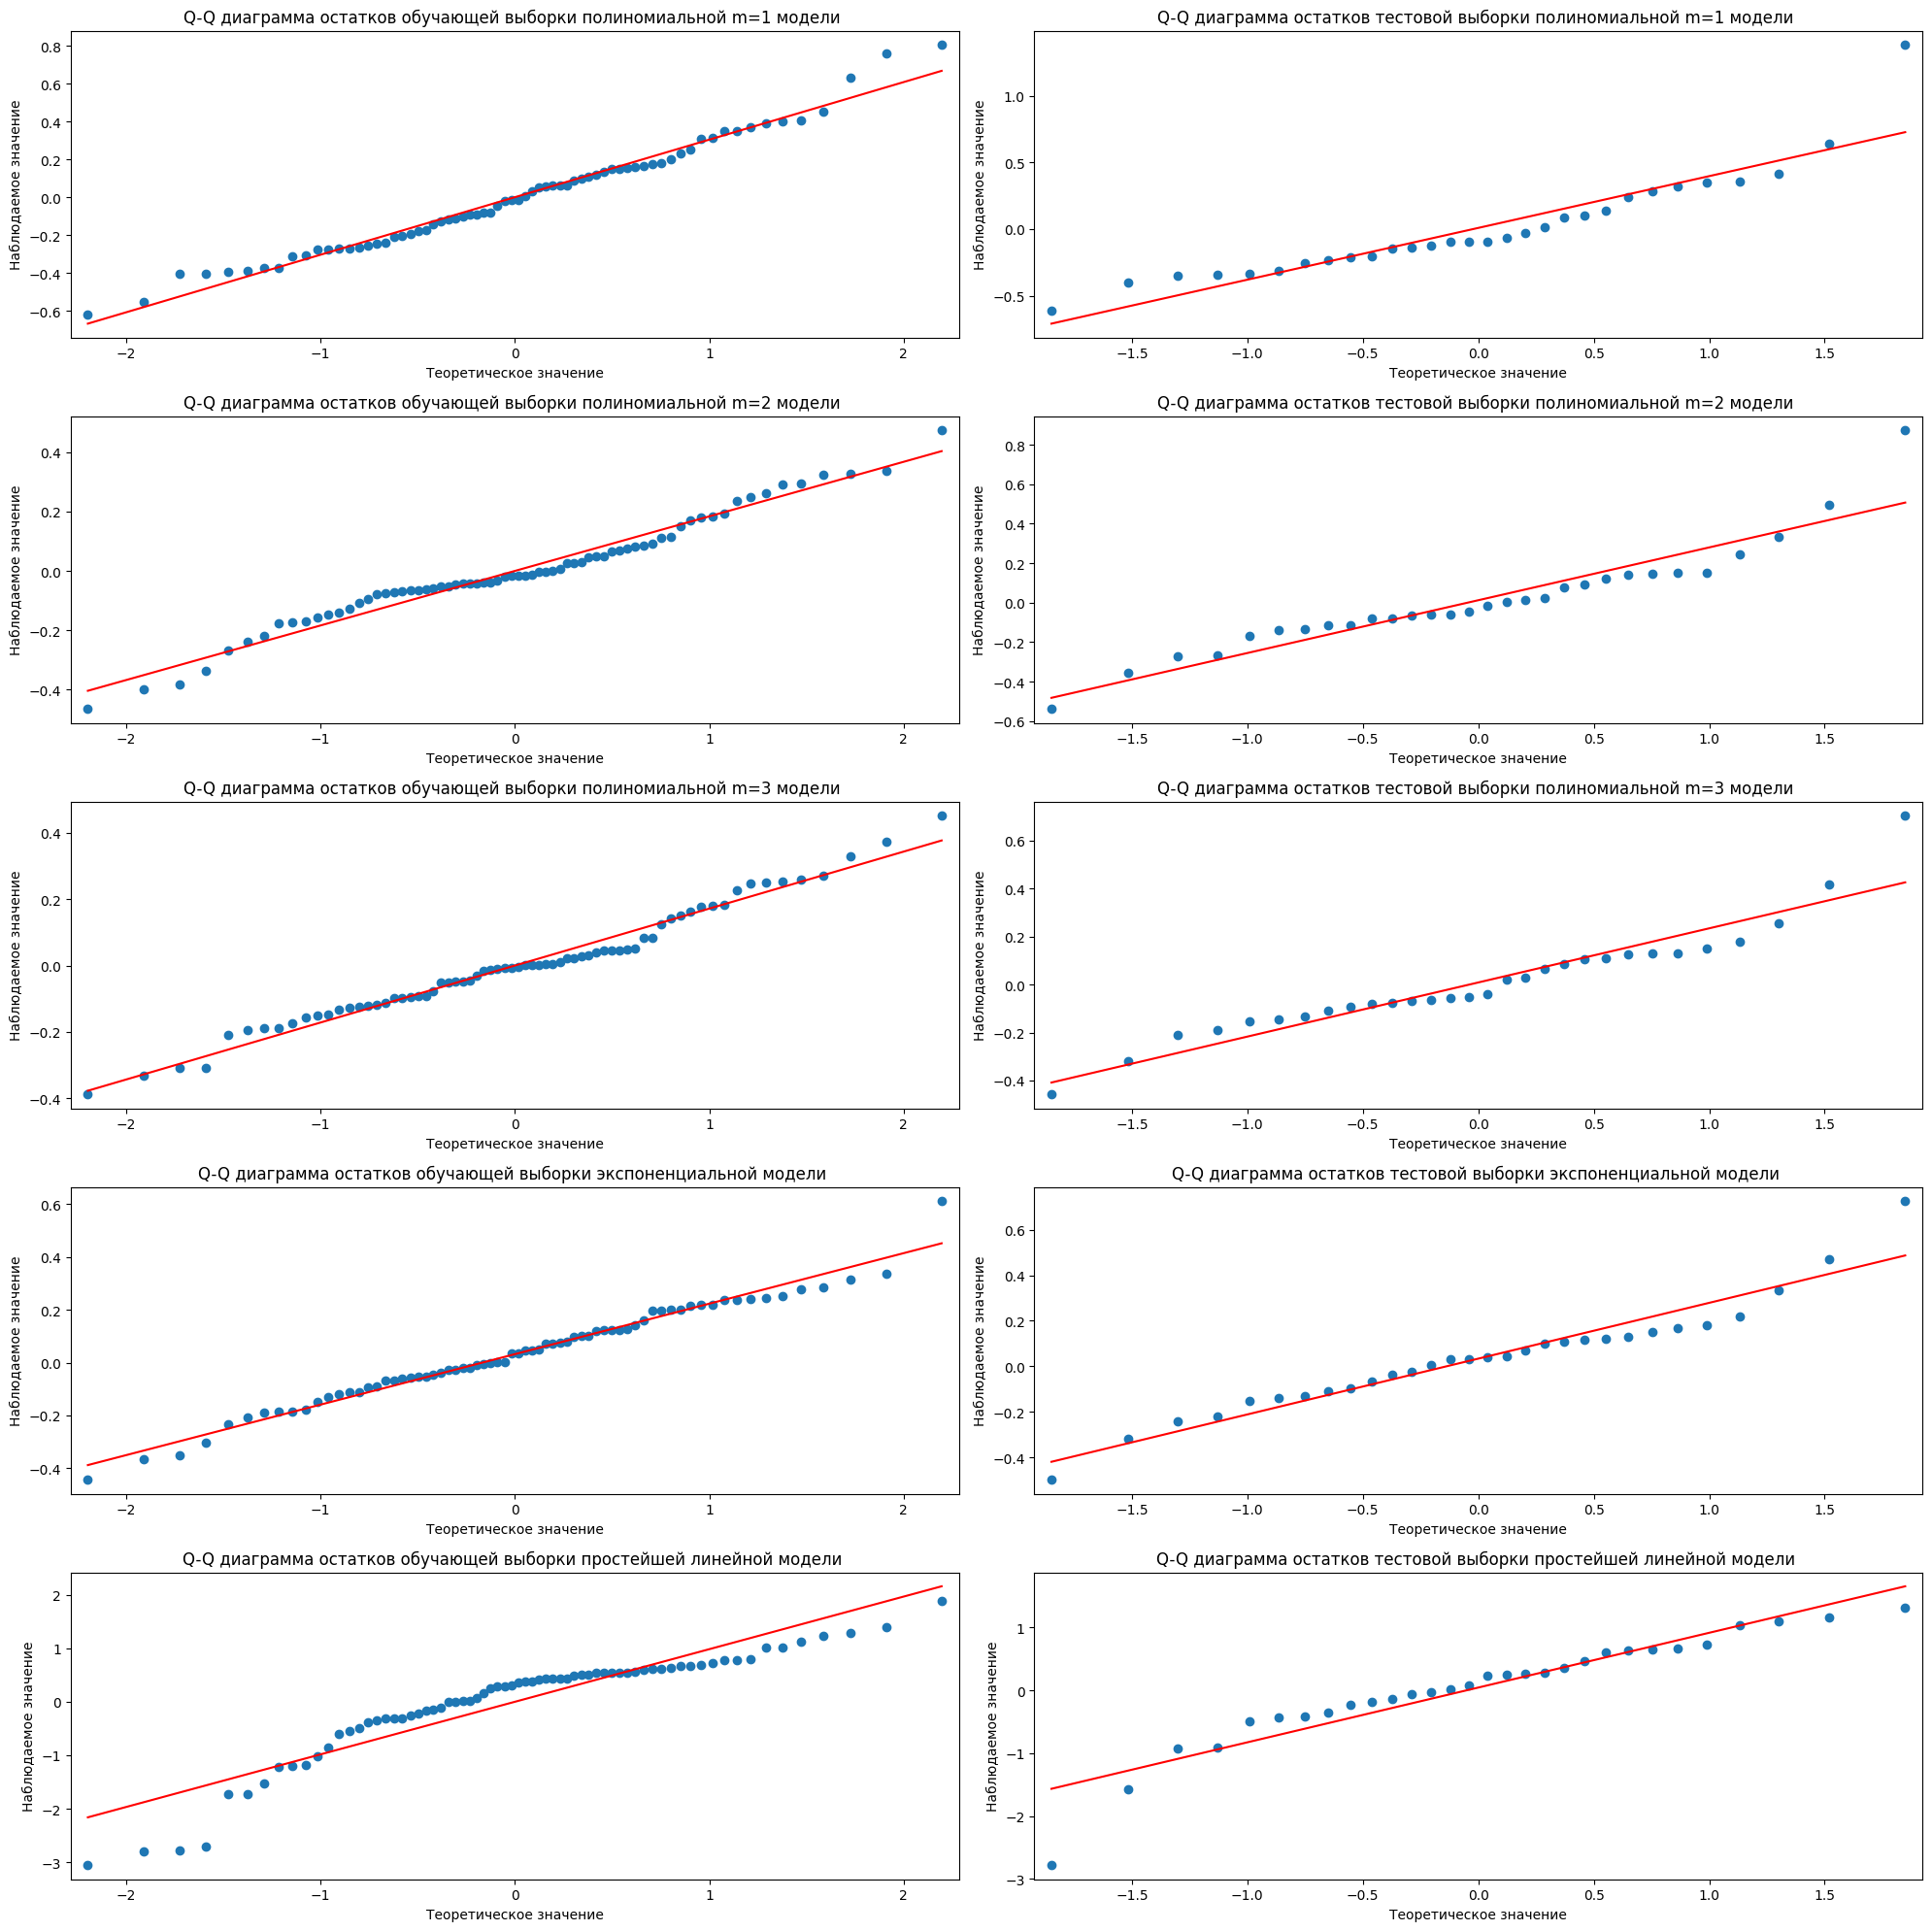

In [375]:
# Визуализация остатков с помощью Q-Q диаграмм
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
for i, residuals in enumerate([residuals_poly_m1, residuals_poly_m2, residuals_poly_m3, residuals_exp, residuals_linear]):
    for j, residual in enumerate(residuals):
        sm.qqplot(residual, line='r', ax=axs[i, j])
        axs[i, j].set_title(
            f"Q-Q диаграмма остатков {['обучающей', 'тестовой'][j]} выборки {['полиномиальной m=1', 'полиномиальной m=2', 'полиномиальной m=3', 'экспоненциальной', 'простейшей линейной'][i]} модели ")
        axs[i, j].set_xlabel("Теоретическое значение")
        axs[i, j].set_ylabel("Наблюдаемое значение")

plt.tight_layout()
plt.show()

Визуально по Q-Q диаграммам можно сделать следующие выводы:
1. Из обучающих выборок нормальное распределение скорее всего имеют: полиномиальная (m = 3), поскольку мало сильных отклонений от линии, точки распределены симметрично относительно линии и по большей части сосредоточены в центре и экспоненциальная
2. Из тестовых выборок скорее всего ни одна нормальное распределение не имеет


### Задание 6
Сделать вывод по результатам сравнения обученных линейных и нелинейной регрессионных моделей.

Вывод: лучше всего для описания изучаемой системы показала себя полиномиальная модель для m = 3, хуже всего -- простейшая линейная модель на логарифмированном результирующем векторе. 